In [3]:
#Bseline model
import numpy as np

In [4]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

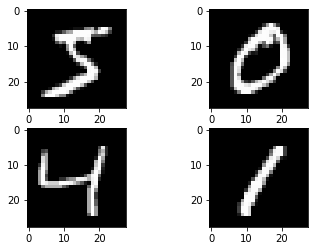

In [5]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
plt.show()

In [6]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
from keras.utils import np_utils
Y_test = y_test
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Using TensorFlow backend.


In [27]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
hidden_layer_nodes=50
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(hidden_layer_nodes, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(hidden_layer_nodes, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    sgd = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

    return model

In [28]:
model = baseline_model()
# Fit the model
nn_simple = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=2)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.1975 - acc: 0.0987 - val_loss: 0.1549 - val_acc: 0.0980
Epoch 2/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1346 - acc: 0.0987 - val_loss: 0.1199 - val_acc: 0.0980
Epoch 3/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.1121 - acc: 0.0987 - val_loss: 0.1061 - val_acc: 0.0980
Epoch 4/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1025 - acc: 0.0986 - val_loss: 0.0996 - val_acc: 0.0978
Epoch 5/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0978 - acc: 0.1187 - val_loss: 0.0962 - val_acc: 0.1135
Epoch 6/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0951 - acc: 0.1124 - val_loss: 0.0942 - val_acc: 0.1135
Epoch 7/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0935 - acc: 0.1124 - val_loss: 0.

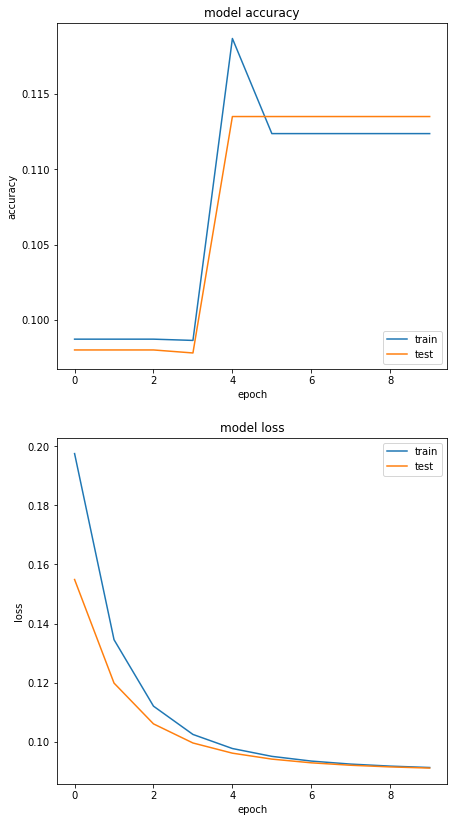

In [29]:
plt.subplot(2,1,1)
plt.plot(nn_simple.history['acc'])
plt.plot(nn_simple.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(nn_simple.history['loss'])
plt.plot(nn_simple.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()



1135  classified correctly
8865  classified incorrectly


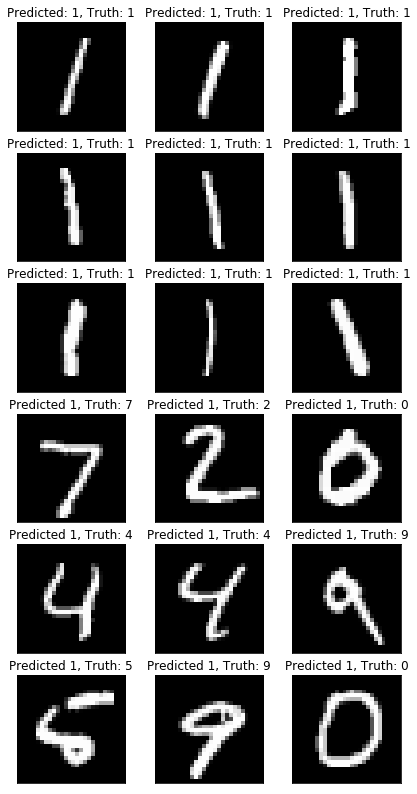

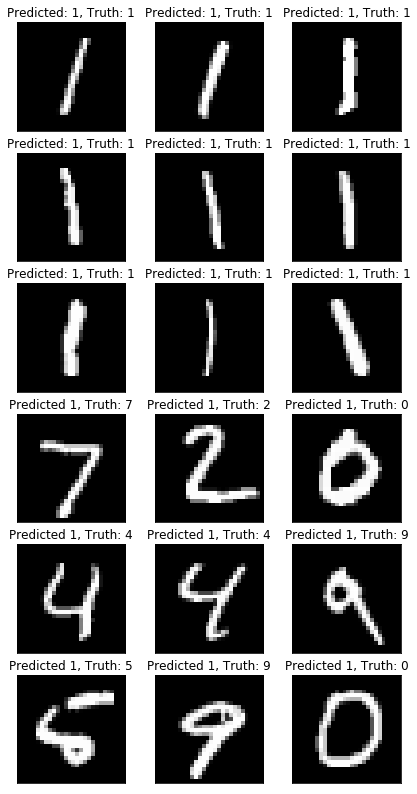

In [30]:
import numpy as np
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        Y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       Y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

In [31]:
#Question 1: Change the number of nureons to 65 in the hidden layers. 

hidden_layer_nodes=65
def Q1_model():
    # create model
    model = Sequential()
    model.add(Dense(hidden_layer_nodes, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(hidden_layer_nodes, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    sgd = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

    return model

In [32]:
model = Q1_model()
# Fit the model
nn_simple = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=2)
print("Model 1 Error: %.2f%%" % (100-scores[1]*100))
print("Model 1 Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 28us/sample - loss: 0.1795 - acc: 0.0979 - val_loss: 0.1377 - val_acc: 0.1007
Epoch 2/10
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1211 - acc: 0.1016 - val_loss: 0.1098 - val_acc: 0.1008
Epoch 3/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1042 - acc: 0.0946 - val_loss: 0.1001 - val_acc: 0.0524
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0977 - acc: 0.0900 - val_loss: 0.0958 - val_acc: 0.1135
Epoch 5/10
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0946 - acc: 0.1124 - val_loss: 0.0936 - val_acc: 0.1135
Epoch 6/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0929 - acc: 0.1124 - val_loss: 0.0924 - val_acc: 0.1135
Epoch 7/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0920 - acc: 0.1124 - val_loss: 0.

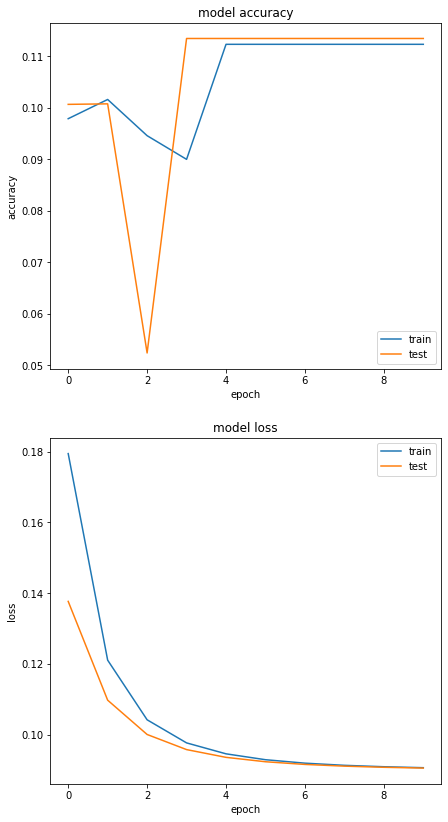

In [33]:
plt.subplot(2,1,1)
plt.plot(nn_simple.history['acc'])
plt.plot(nn_simple.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(nn_simple.history['loss'])
plt.plot(nn_simple.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()


1135  classified correctly
8865  classified incorrectly


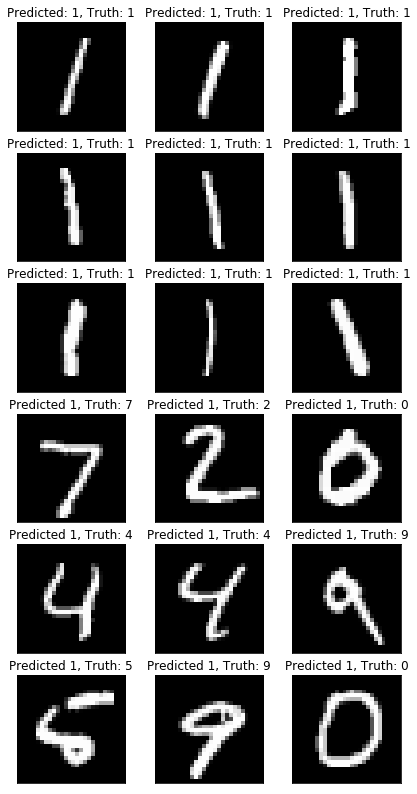

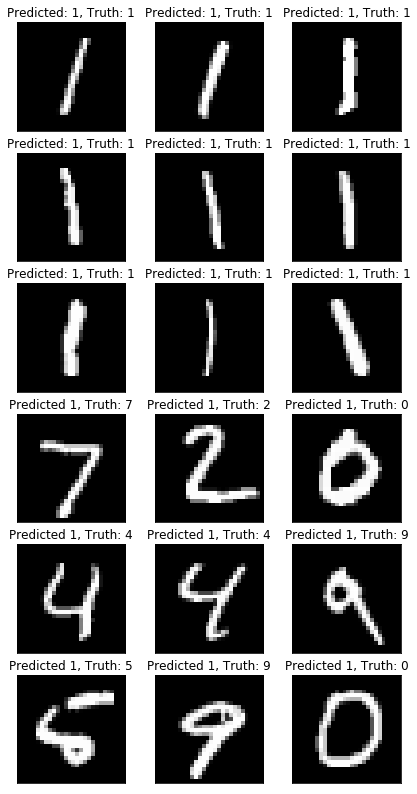

In [34]:
import numpy as np
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        Y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       Y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

In [43]:
#Q2: Change the epochs to 30 while reverting number of neurons to 50 in hidden layers
hidden_layer_nodes=50
def Q2_model():
    # create model
    model = Sequential()
    model.add(Dense(hidden_layer_nodes, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(hidden_layer_nodes, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    sgd = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

    return model

model = Q2_model()
# Fit the model
nn_simple = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=2)
print("Model 2 Error: %.2f%%" % (100-scores[1]*100))
print("Model 2 Accuracy: %.2f%%" % (scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 31us/sample - loss: 0.1943 - acc: 0.0986 - val_loss: 0.1524 - val_acc: 0.0958
Epoch 2/30
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1327 - acc: 0.0986 - val_loss: 0.1186 - val_acc: 0.0958
Epoch 3/30
60000/60000 [==============================] - 2s 26us/sample - loss: 0.1111 - acc: 0.0986 - val_loss: 0.1054 - val_acc: 0.0958
Epoch 4/30
60000/60000 [==============================] - 2s 27us/sample - loss: 0.1019 - acc: 0.0963 - val_loss: 0.0992 - val_acc: 0.0801
Epoch 5/30
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0974 - acc: 0.1078 - val_loss: 0.0959 - val_acc: 0.1135
Epoch 6/30
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0949 - acc: 0.1124 - val_loss: 0.0940 - val_acc: 0.1135
Epoch 7/30
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0934 - acc: 0.1124 - val_loss: 0.

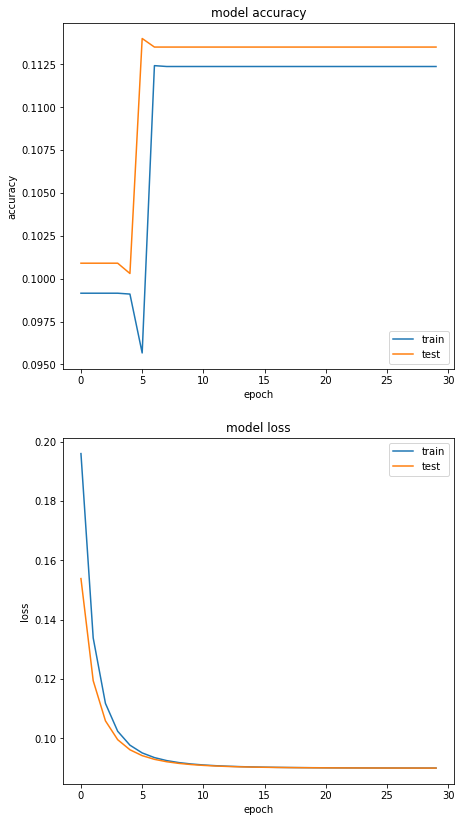

In [36]:
plt.subplot(2,1,1)
plt.plot(nn_simple.history['acc'])
plt.plot(nn_simple.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(nn_simple.history['loss'])
plt.plot(nn_simple.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()


1135  classified correctly
8865  classified incorrectly


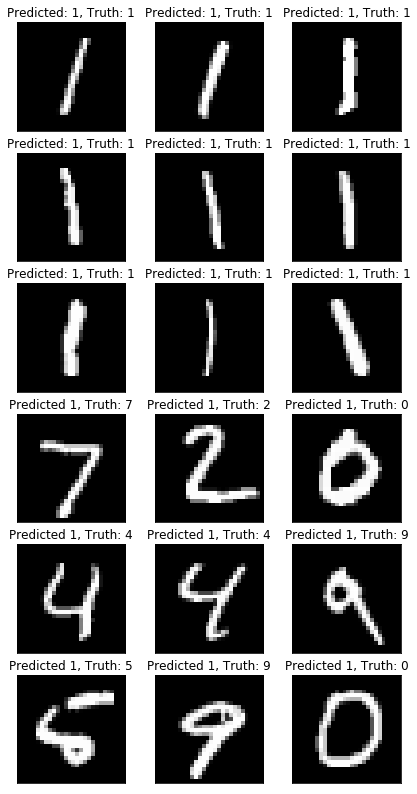

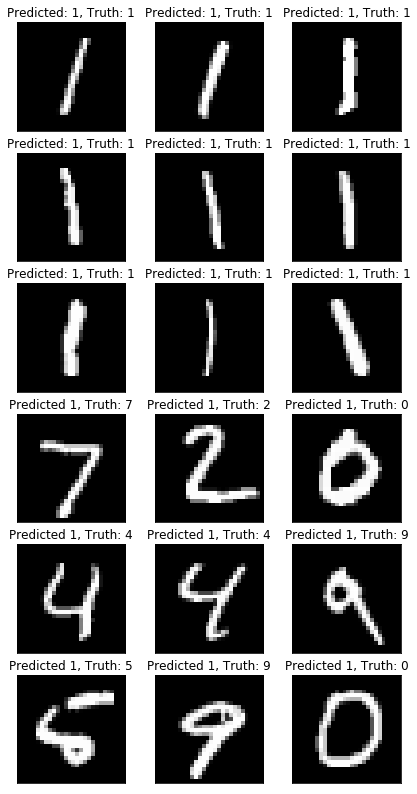

In [37]:
import numpy as np
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        Y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       Y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2176 - acc: 0.0993 - val_loss: 0.1904 - val_acc: 0.1032
Epoch 2/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1709 - acc: 0.0993 - val_loss: 0.1541 - val_acc: 0.1032
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1422 - acc: 0.0993 - val_loss: 0.1319 - val_acc: 0.1032
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1246 - acc: 0.0993 - val_loss: 0.1182 - val_acc: 0.1032
Epoch 5/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1136 - acc: 0.0993 - val_loss: 0.1096 - val_acc: 0.1032
Epoch 6/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.1066 - acc: 0.0993 - val_loss: 0.1040 - val_acc: 0.1032
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.1020 - acc: 0.1111 - val_loss: 0.

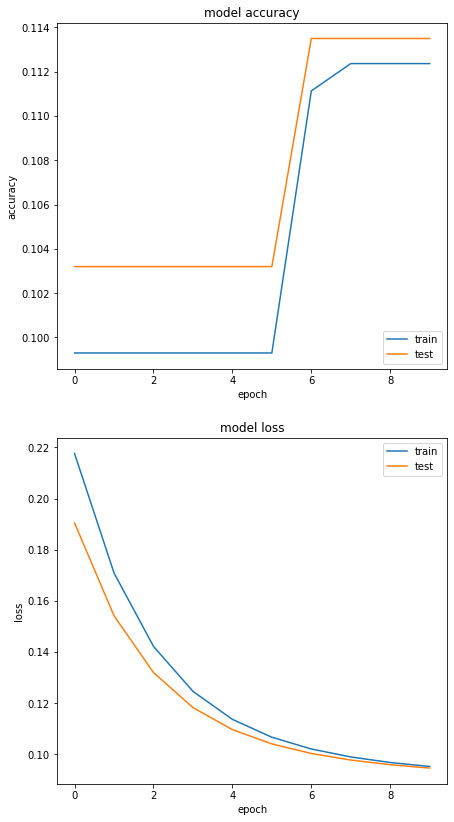

In [45]:
#Q3: Add one layer with 20 nodes to the neuron network. 
hidden_layer_nodes=50
hidden_layer_nodes_add=20
def Q3_model():
    # create model
    model = Sequential()
    model.add(Dense(hidden_layer_nodes, input_dim=num_pixels, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(hidden_layer_nodes, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(hidden_layer_nodes_add, kernel_initializer='normal', activation='sigmoid'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='sigmoid'))
   
    # Compile model
    sgd = optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

    return model


model = Q3_model()
# Fit the model
nn_simple = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=2)
print("Model 3 Error: %.2f%%" % (100-scores[1]*100))
print("Model3 Accuracy: %.2f%%" % (scores[1]*100))

plt.subplot(2,1,1)
plt.plot(nn_simple.history['acc'])
plt.plot(nn_simple.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(nn_simple.history['loss'])
plt.plot(nn_simple.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()


1135  classified correctly
8865  classified incorrectly


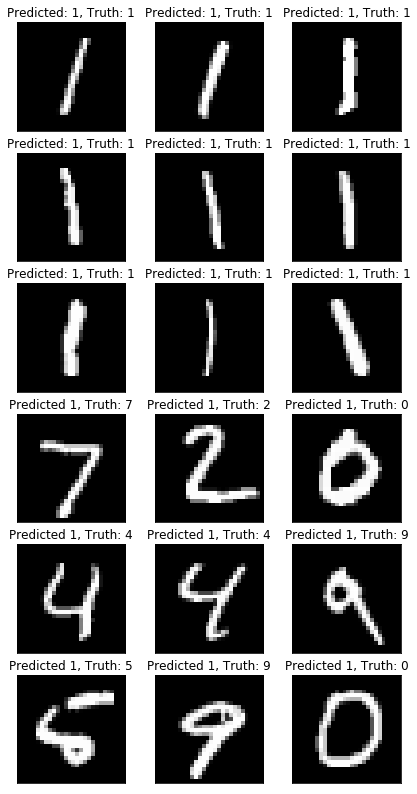

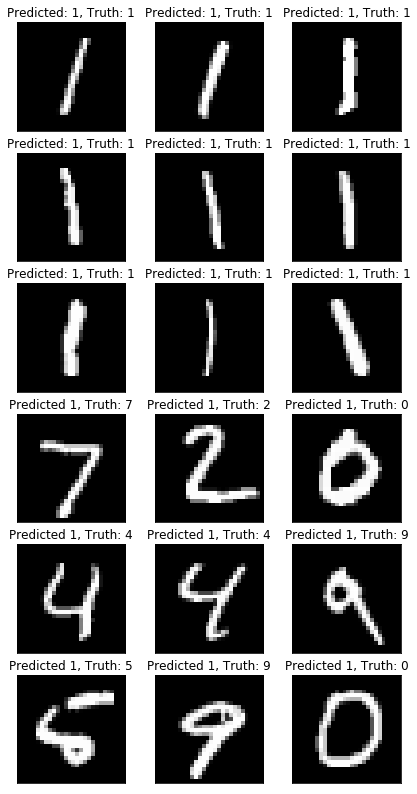

In [46]:
import numpy as np
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == Y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != Y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        Y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       Y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

In [ ]:
#Summary
#The baseline model had 2 hidden layers with 50 notes each, using 10 epochs, resulting in accuracy of 11.35%. Model 1 had 2 hidden layers of 65 neurons each, using 10 epochs, resulting in accuracy of also 11.35%. Model 2 had 2 hidden layers at 50 neurons each, using 30 epochs, resulting in 11.35% accuracy again. Model 3 had 3 hidden layers, among which the first two layers had 50 neurons each, and the third hidden layer had 20 neurons, using 10 epochs, reaching the same results again. If the coding process is solid, this means that changes in neuron numbers, hidden layers, epochs etc. do not lead to different training result, only changing the learning paths along the epochs as shown by the accuracy and loss graphs. 